# Etapa 1: Análise Exploratória de Dados (EDA)

## Objetivos
Nesta etapa, realizaremos uma investigação completa no dataset do projeto. Exploraremos os dados para entender suas características, identificar problemas de qualidade e descobrir os primeiros insights que guiarão as próximas etapas do projeto.

**Lembre-se**: O foco aqui é analisar, e não modificar os dados.


In [20]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuração para exibir gráficos inline no Jupyter Notebook
%matplotlib inline

# Configurações de visualização
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    plt.style.use('seaborn-darkgrid')  # Fallback para versões mais antigas
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Configuração para exibir todas as colunas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Configuração adicional para garantir que gráficos apareçam
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100

print("Bibliotecas importadas com sucesso!")


Bibliotecas importadas com sucesso!


## 1. Carregamento e Visão Geral dos Dados

Começamos carregando o dataset e fazendo uma inspeção rápida para entender sua estrutura.


In [ ]:
# Carregar o dataset
df = pd.read_csv('../../data/students_performance.csv')

print("Dataset carregado com sucesso!")
print(f"\nFormato do dataset: {df.shape}")
print(f"Número de linhas: {df.shape[0]}")
print(f"Número de colunas: {df.shape[1]}")


Dataset carregado com sucesso!

Formato do dataset: (2510, 14)
Número de linhas: 2510
Número de colunas: 14


In [22]:
# Visualizar as primeiras linhas
df.head(10)


,student_id,age,gender,parental_education,study_hours_week,attendance_rate,extracurricular,sleep_hours,previous_scores,tutoring,internet_quality,family_income,health_status,final_grade
0,STD01416,22,M,bachelor,5.66,69.55,Yes,6.49,49.41,No,Good,Medium,Good,85.39
1,STD01345,19,M,bachelor,13.30,58.82,Yes,8.12,50.29,No,NaN,Medium,Good,98.43
2,STD01705,25,M,master,10.43,59.72,Yes,6.60,71.64,No,Good,Medium,Good,100.00
3,STD00299,21,F,bachelor,3.90,68.33,Yes,6.99,50.93,Yes,Poor,Low,Excellent,86.85
4,STD01762,19,F,bachelor,4.24,50.44,Yes,8.06,54.00,No,Poor,Medium,Excellent,83.25
5,STD00396,22,M,bachelor,15.06,53.76,Yes,6.72,55.30,Yes,Good,Low,Excellent,98.40
6,STD02045,21,F,bachelor,2.69,61.39,No,NaN,49.48,No,Good,Medium,Good,82.39
7,STD00258,19,F,master,10.23,72.88,No,5.05,62.54,No,Poor,High,Good,93.03
8,STD01805,25,M,bachelor,14.56,50.43,Yes,7.09,46.18,No,Excellent,Low,Good,91.03
9,STD01844,18,M,high_school,7.38,64.39,Yes,6.42,21.65,No,Poor,NaN,Good,77.99


In [23]:
# Visualizar as últimas linhas
df.tail(10)


,student_id,age,gender,parental_education,study_hours_week,attendance_rate,extracurricular,sleep_hours,previous_scores,tutoring,internet_quality,family_income,health_status,final_grade
2500,STD00928,22,F,doctorate,13.04,66.12,No,7.22,44.12,Yes,Excellent,High,Good,100.00
2501,STD01240,21,F,high_school,12.45,61.28,No,8.87,46.60,No,Good,Medium,Good,93.70
2502,STD02099,20,F,doctorate,7.62,65.49,No,NaN,64.35,No,NaN,Low,Good,98.81
2503,STD00744,21,M,high_school,NaN,NaN,Yes,5.42,67.22,No,NaN,High,Excellent,92.31
2504,STD01417,20,F,bachelor,4.23,55.06,No,8.77,64.48,No,Good,Medium,Excellent,93.77
2505,STD00680,25,F,high_school,13.02,NaN,No,6.73,44.23,No,Good,High,Good,95.60
2506,STD01401,20,M,high_school,6.58,52.33,Yes,6.40,NaN,Yes,Good,High,Good,88.39
2507,STD02028,20,M,high_school,15.86,71.71,Yes,NaN,67.80,No,Good,Low,Good,96.71
2508,STD01147,23,M,bachelor,NaN,NaN,No,8.23,63.08,No,Good,Medium,Good,96.61
2509,STD00501,20,M,doctorate,14.77,53.52,Yes,6.90,49.52,Yes,NaN,Low,Excellent,100.00


In [24]:
# Informações sobre a estrutura do dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2510 entries, 0 to 2509
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          2510 non-null   object 
 1   age                 2510 non-null   int64  
 2   gender              2510 non-null   object 
 3   parental_education  2510 non-null   object 
 4   study_hours_week    2217 non-null   float64
 5   attendance_rate     2278 non-null   float64
 6   extracurricular     2510 non-null   object 
 7   sleep_hours         2244 non-null   float64
 8   previous_scores     2383 non-null   float64
 9   tutoring            2510 non-null   object 
 10  internet_quality    2355 non-null   object 
 11  family_income       2232 non-null   object 
 12  health_status       2510 non-null   object 
 13  final_grade         2510 non-null   float64
dtypes: float64(5), int64(1), object(8)
memory usage: 274.7+ KB


In [25]:
# Identificar variáveis numéricas e categóricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Variáveis Numéricas:")
print(numeric_cols)
print(f"\nTotal: {len(numeric_cols)} variáveis numéricas")

print("\n" + "="*50)
print("\nVariáveis Categóricas:")
print(categorical_cols)
print(f"\nTotal: {len(categorical_cols)} variáveis categóricas")


Variáveis Numéricas:
['age', 'study_hours_week', 'attendance_rate', 'sleep_hours', 'previous_scores', 'final_grade']

Total: 6 variáveis numéricas


Variáveis Categóricas:
['student_id', 'gender', 'parental_education', 'extracurricular', 'tutoring', 'internet_quality', 'family_income', 'health_status']

Total: 8 variáveis categóricas


In [26]:
# Estatísticas descritivas para variáveis numéricas
df[numeric_cols].describe()


,age,study_hours_week,attendance_rate,sleep_hours,previous_scores,final_grade
count,2510.000000,2217.000000,2278.000000,2244.000000,2383.000000,2510.000000
mean,21.623904,10.603554,59.679789,6.996569,57.261028,92.090076
std,2.766664,8.635456,10.611523,1.336190,9.477943,7.446434
min,17.000000,-3.620000,20.820000,2.070000,21.200000,63.240000
25%,20.000000,6.510000,52.840000,6.130000,51.105000,86.982500
50%,22.000000,9.960000,59.905000,6.990000,57.300000,93.310000
75%,24.000000,13.400000,66.652500,7.830000,63.620000,99.850000
max,99.000000,113.200000,108.950000,15.950000,86.100000,101.070000


### Documentação: Visão Geral dos Dados

**Descrição do Dataset:**
- Dataset sobre desempenho de estudantes contendo informações sobre características dos alunos e suas notas finais.

**Estrutura:**
- Número de linhas: [preencher após execução]
- Número de colunas: [preencher após execução]

**Variáveis:**
- Variáveis numéricas: [listar após execução]
- Variáveis categóricas: [listar após execução]

**Variável Alvo:**
- `final_grade`: Nota final do estudante (variável que queremos prever)


## 2. Análise de Qualidade dos Dados

Investigar problemas comuns que podem afetar a qualidade do modelo no futuro.


In [27]:
# Calcular valores faltantes
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Valores Faltantes': missing_values,
    'Porcentagem (%)': missing_percentage
})

# Filtrar apenas colunas com valores faltantes
missing_df = missing_df[missing_df['Valores Faltantes'] > 0].sort_values('Porcentagem (%)', ascending=False)

print("Valores Faltantes por Coluna:")
print("="*50)
if len(missing_df) > 0:
    print(missing_df)
else:
    print("Nenhum valor faltante encontrado!")


Valores Faltantes por Coluna:
                  Valores Faltantes  Porcentagem (%)
study_hours_week                293        11.673307
family_income                   278        11.075697
sleep_hours                     266        10.597610
attendance_rate                 232         9.243028
internet_quality                155         6.175299
previous_scores                 127         5.059761


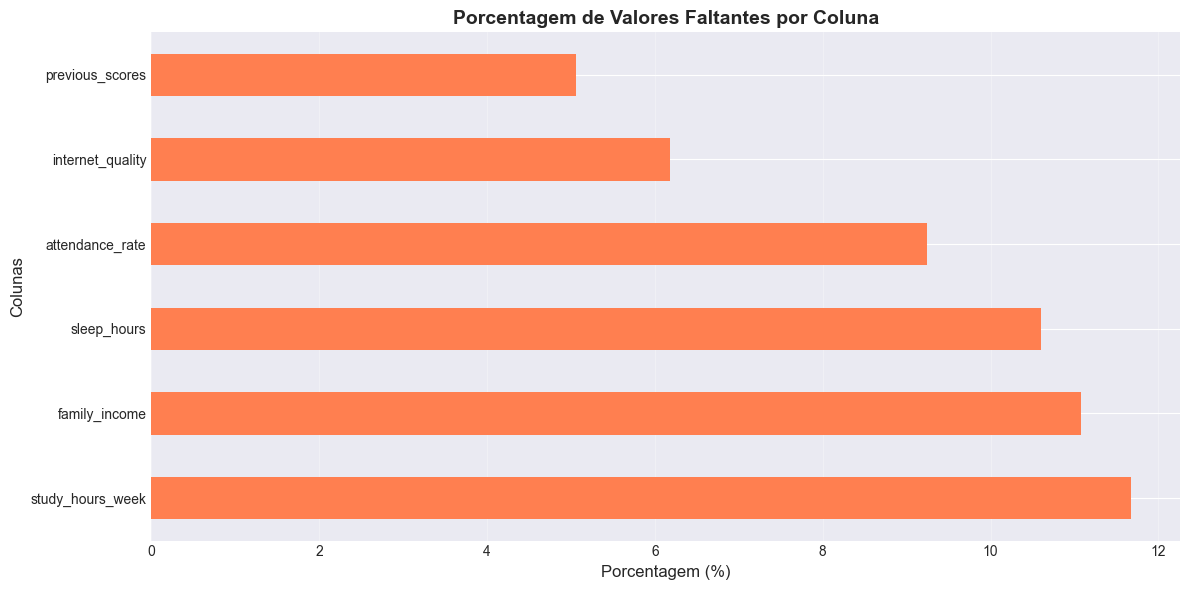

In [28]:
# Visualizar valores faltantes com gráfico de barras
if len(missing_df) > 0:
    plt.figure(figsize=(12, 6))
    missing_df['Porcentagem (%)'].plot(kind='barh', color='coral')
    plt.title('Porcentagem de Valores Faltantes por Coluna', fontsize=14, fontweight='bold')
    plt.xlabel('Porcentagem (%)', fontsize=12)
    plt.ylabel('Colunas', fontsize=12)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Não há valores faltantes para visualizar.")


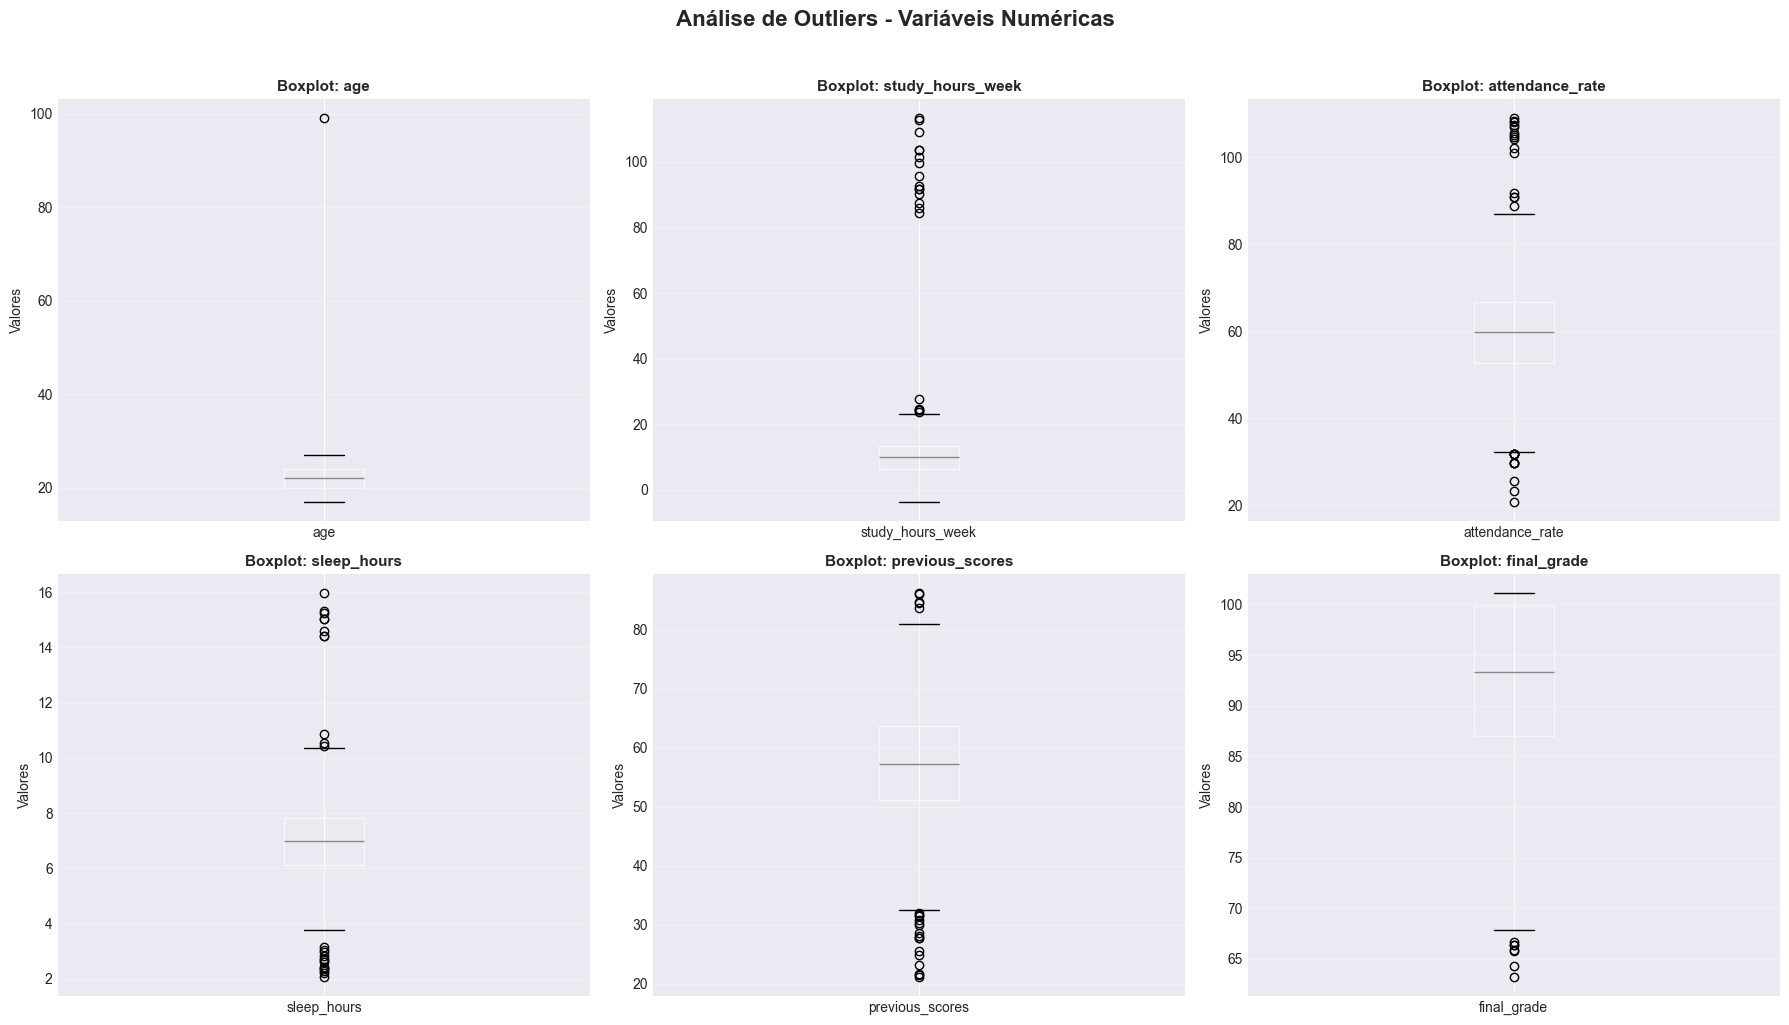

In [29]:
# Boxplots para identificar outliers em variáveis numéricas
n_cols = len(numeric_cols)
n_rows = (n_cols + 2) // 3  # 3 colunas por linha

fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5*n_rows))
axes = axes.flatten() if n_cols > 1 else [axes]

for idx, col in enumerate(numeric_cols):
    if idx < len(axes):
        df.boxplot(column=col, ax=axes[idx], vert=True)
        axes[idx].set_title(f'Boxplot: {col}', fontsize=11, fontweight='bold')
        axes[idx].set_ylabel('Valores', fontsize=10)
        axes[idx].grid(axis='y', alpha=0.3)

# Ocultar eixos extras se houver
for idx in range(len(numeric_cols), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Análise de Outliers - Variáveis Numéricas', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


In [30]:
# Análise detalhada de outliers usando IQR (Intervalo Interquartil)
outliers_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_count = len(outliers)
    outliers_percentage = (outliers_count / len(df)) * 100
    
    outliers_summary[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Limite Inferior': lower_bound,
        'Limite Superior': upper_bound,
        'Número de Outliers': outliers_count,
        'Porcentagem de Outliers (%)': outliers_percentage
    }

outliers_df = pd.DataFrame(outliers_summary).T
print("Resumo de Outliers por Variável Numérica:")
print("="*80)
print(outliers_df)


Resumo de Outliers por Variável Numérica:
                       Q1       Q3      IQR  Limite Inferior  Limite Superior  \
age               20.0000  24.0000   4.0000         14.00000         30.00000   
study_hours_week   6.5100  13.4000   6.8900         -3.82500         23.73500   
attendance_rate   52.8400  66.6525  13.8125         32.12125         87.37125   
sleep_hours        6.1300   7.8300   1.7000          3.58000         10.38000   
previous_scores   51.1050  63.6200  12.5150         32.33250         82.39250   
final_grade       86.9825  99.8500  12.8675         67.68125        119.15125   

                  Número de Outliers  Porcentagem de Outliers (%)  
age                              1.0                     0.039841  
study_hours_week                20.0                     0.796813  
attendance_rate                 27.0                     1.075697  
sleep_hours                     24.0                     0.956175  
previous_scores                 21.0              

### Documentação: Qualidade dos Dados

**Valores Faltantes:**
- Colunas com valores faltantes: [listar após execução]
- Porcentagem de valores faltantes: [documentar após execução]

**Outliers:**
- Colunas com outliers significativos: [listar após execução]
- Porcentagem de outliers por variável: [documentar após execução]

**Hipóteses sobre Valores Faltantes:**
- [Formular hipótese sobre por que os dados estão faltando - ex: erro de coleta, não aplicável, etc.]


## 3. Análise Univariada

Analisar cada variável individualmente para entender sua distribuição e características.


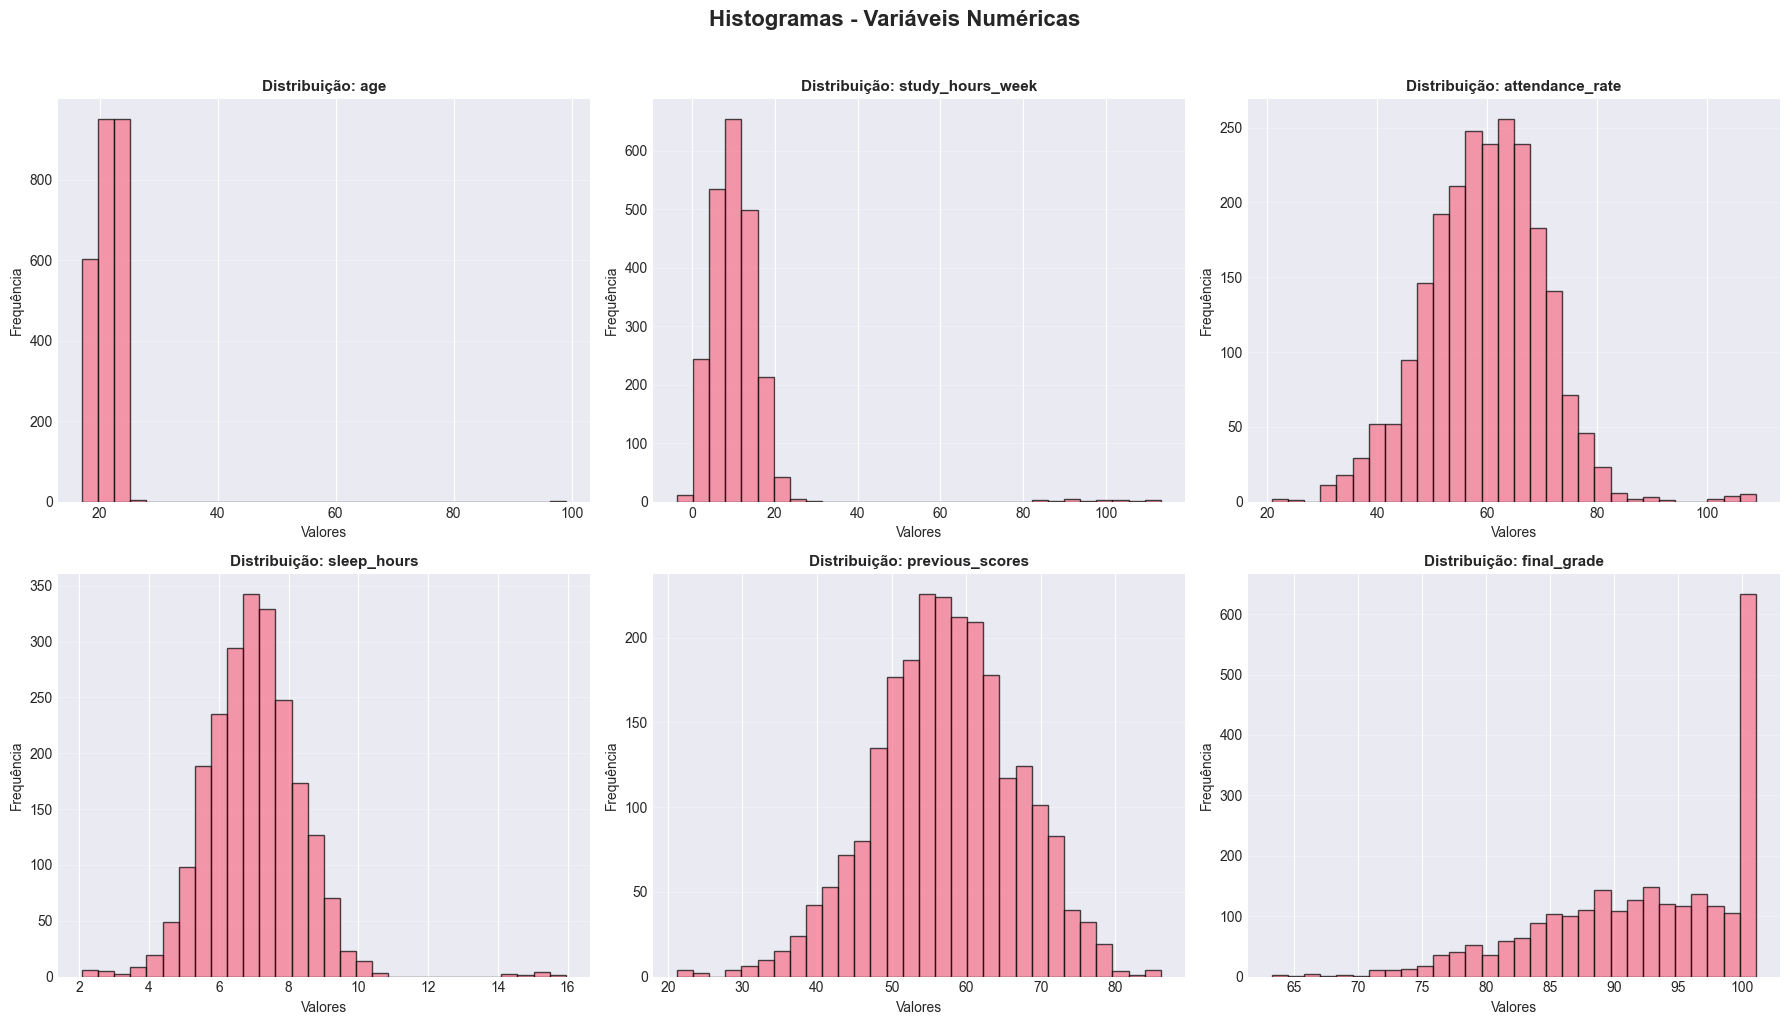

In [31]:
# Histogramas para variáveis numéricas
n_cols = len(numeric_cols)
n_rows = (n_cols + 2) // 3

fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5*n_rows))
axes = axes.flatten() if n_cols > 1 else [axes]

for idx, col in enumerate(numeric_cols):
    if idx < len(axes):
        axes[idx].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribuição: {col}', fontsize=11, fontweight='bold')
        axes[idx].set_xlabel('Valores', fontsize=10)
        axes[idx].set_ylabel('Frequência', fontsize=10)
        axes[idx].grid(axis='y', alpha=0.3)

# Ocultar eixos extras se houver
for idx in range(len(numeric_cols), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Histogramas - Variáveis Numéricas', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


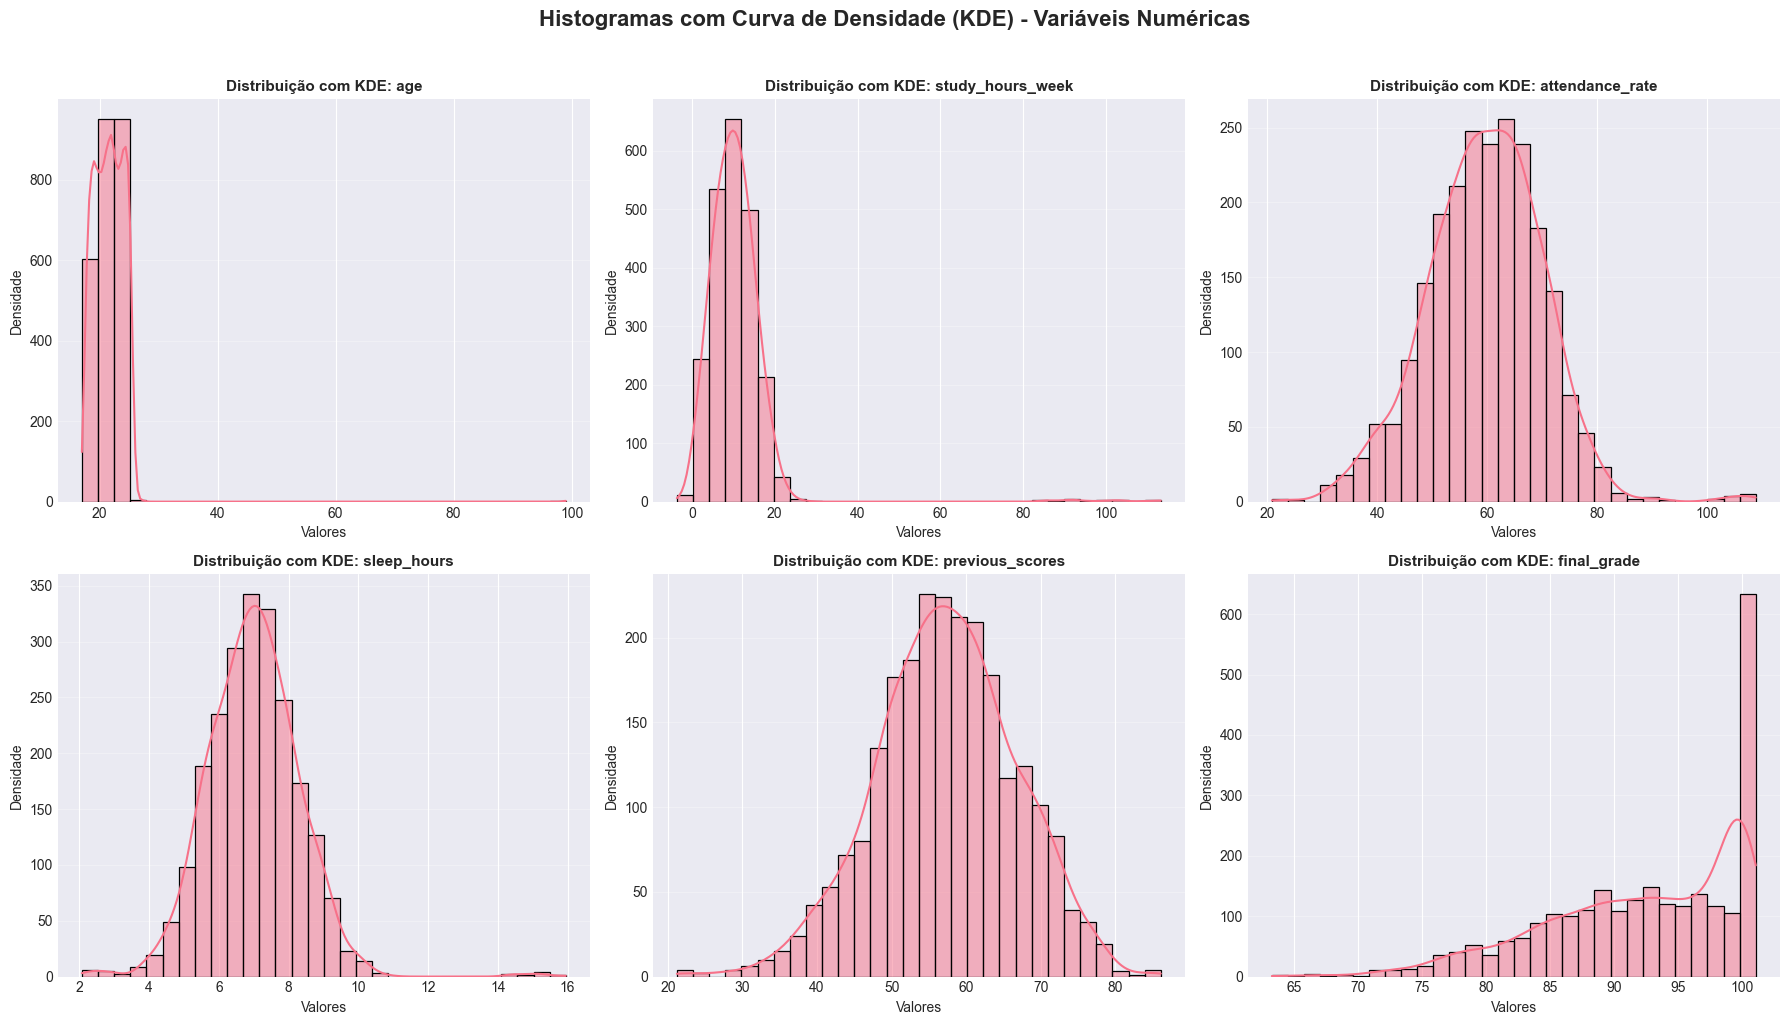

In [32]:
# Histogramas com curva de densidade (KDE) para variáveis numéricas
n_cols = len(numeric_cols)
n_rows = (n_cols + 2) // 3

fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5*n_rows))
axes = axes.flatten() if n_cols > 1 else [axes]

for idx, col in enumerate(numeric_cols):
    if idx < len(axes):
        sns.histplot(df[col].dropna(), kde=True, ax=axes[idx], bins=30)
        axes[idx].set_title(f'Distribuição com KDE: {col}', fontsize=11, fontweight='bold')
        axes[idx].set_xlabel('Valores', fontsize=10)
        axes[idx].set_ylabel('Densidade', fontsize=10)
        axes[idx].grid(axis='y', alpha=0.3)

# Ocultar eixos extras se houver
for idx in range(len(numeric_cols), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Histogramas com Curva de Densidade (KDE) - Variáveis Numéricas', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


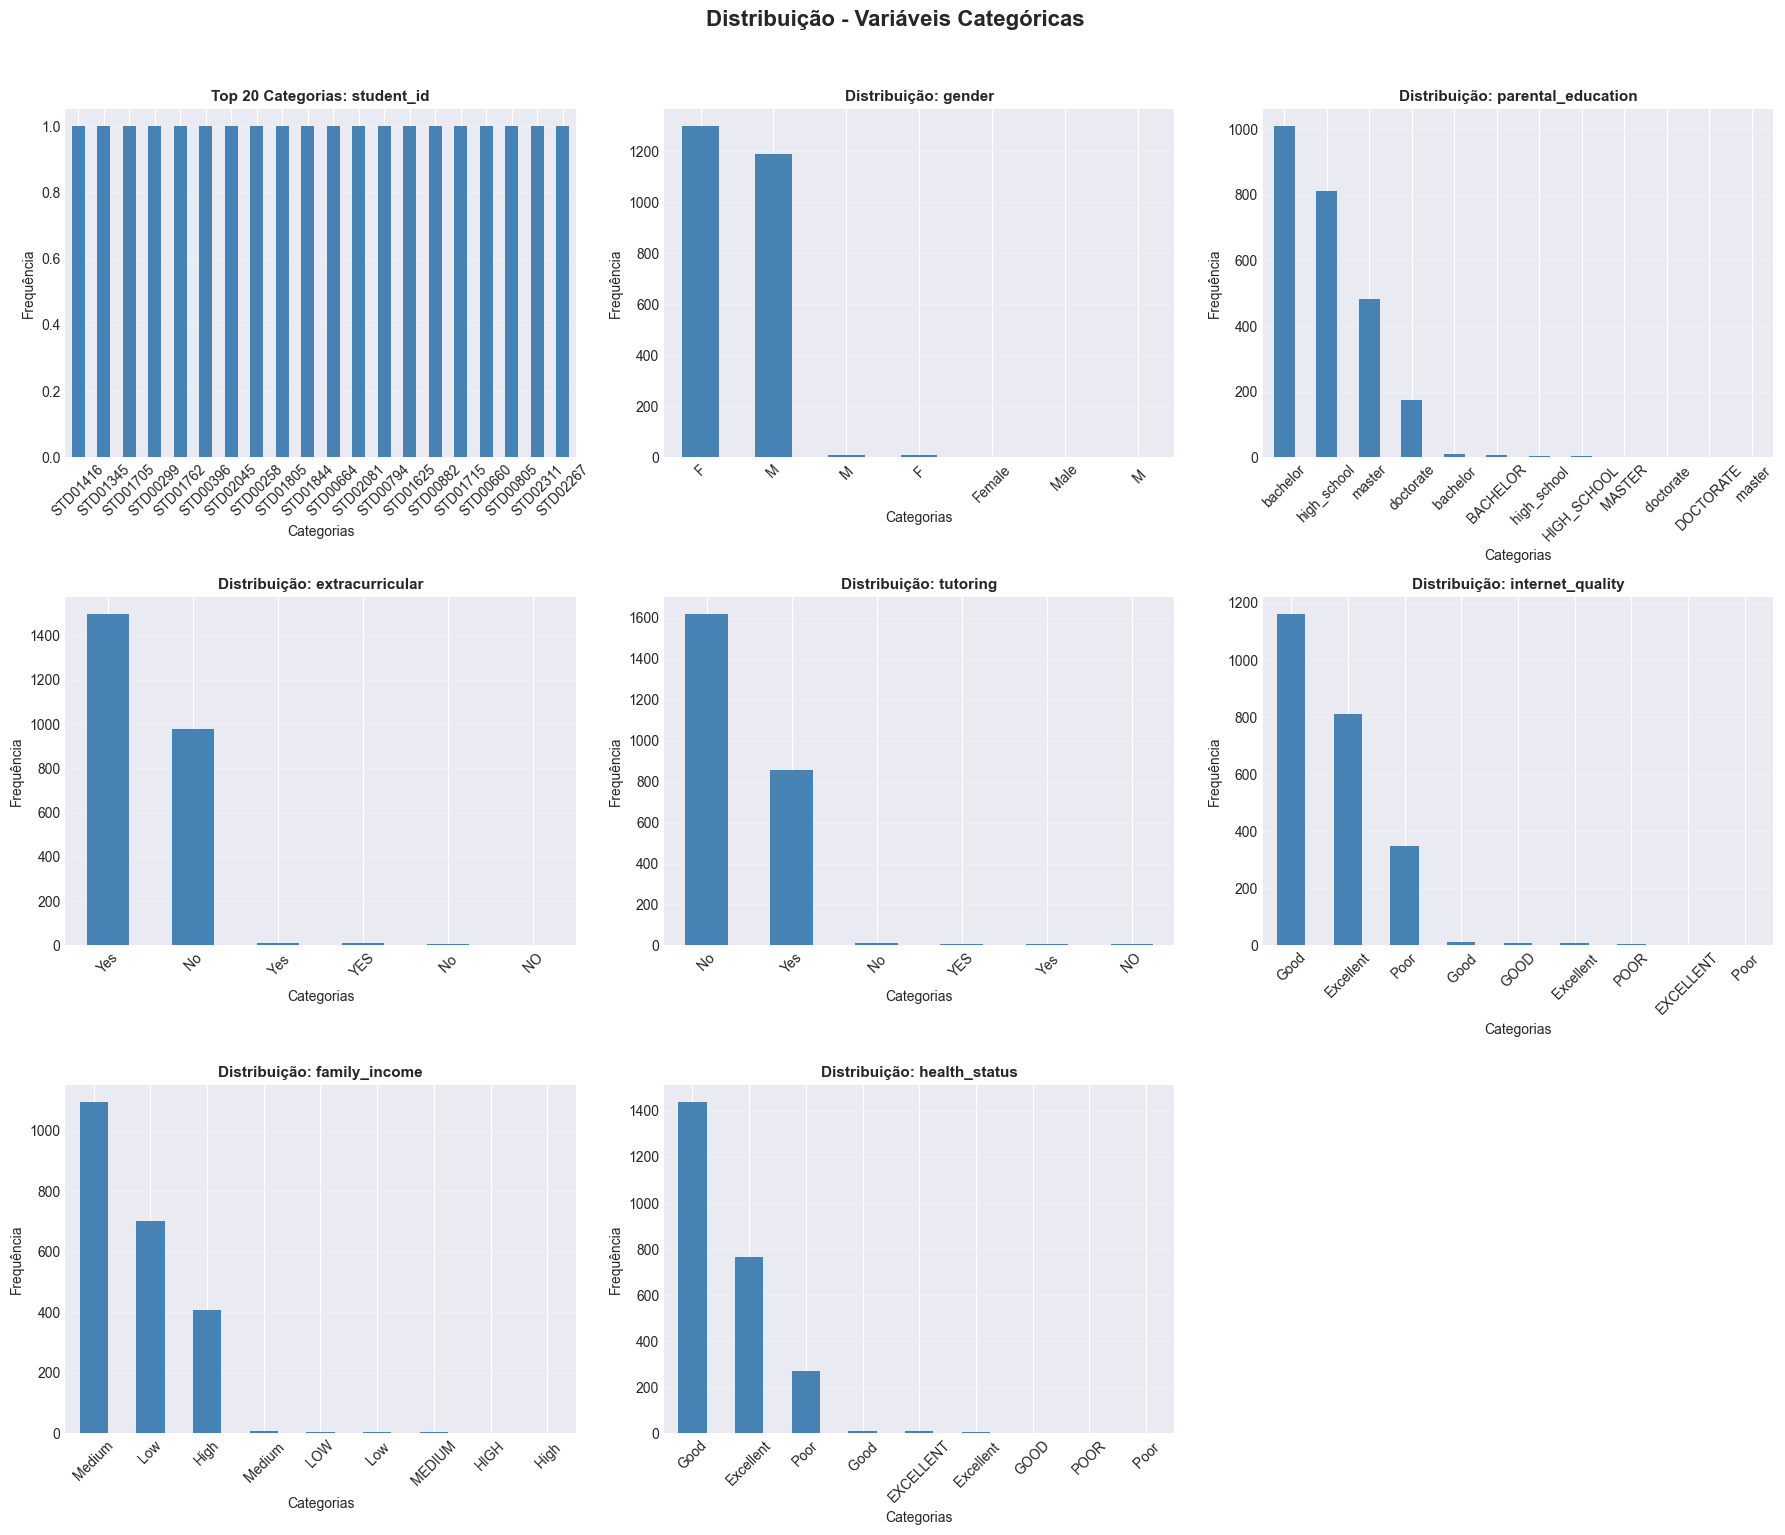

In [33]:
# Gráficos de barras para variáveis categóricas
n_cols = len(categorical_cols)
n_rows = (n_cols + 2) // 3

if n_cols > 0:
    fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5*n_rows))
    axes = axes.flatten() if n_cols > 1 else [axes]
    
    for idx, col in enumerate(categorical_cols):
        if idx < len(axes):
            value_counts = df[col].value_counts()
            # Limitar a 20 categorias para melhor visualização
            if len(value_counts) > 20:
                top_20 = value_counts.head(20)
                top_20.plot(kind='bar', ax=axes[idx], color='steelblue')
                axes[idx].set_title(f'Top 20 Categorias: {col}', fontsize=11, fontweight='bold')
            else:
                value_counts.plot(kind='bar', ax=axes[idx], color='steelblue')
                axes[idx].set_title(f'Distribuição: {col}', fontsize=11, fontweight='bold')
            
            axes[idx].set_xlabel('Categorias', fontsize=10)
            axes[idx].set_ylabel('Frequência', fontsize=10)
            axes[idx].tick_params(axis='x', rotation=45)
            axes[idx].grid(axis='y', alpha=0.3)
    
    # Ocultar eixos extras se houver
    for idx in range(len(categorical_cols), len(axes)):
        axes[idx].set_visible(False)
    
    plt.suptitle('Distribuição - Variáveis Categóricas', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
else:
    print("Não há variáveis categóricas para visualizar.")


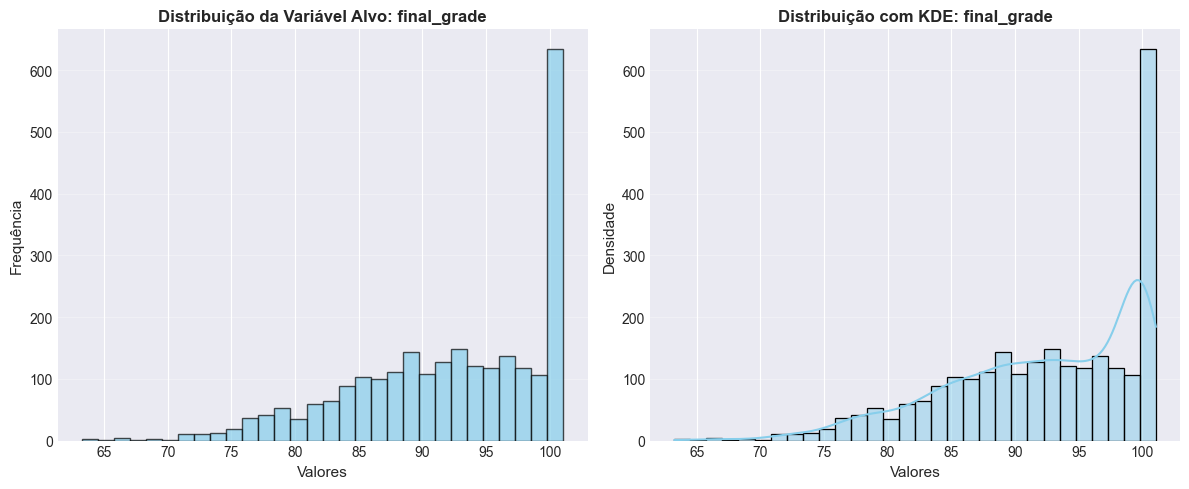


Estatísticas da Variável Alvo (final_grade):
count    2510.000000
mean       92.090076
std         7.446434
min        63.240000
25%        86.982500
50%        93.310000
75%        99.850000
max       101.070000
Name: final_grade, dtype: float64

Assimetria (Skewness): -0.7647
Curtose (Kurtosis): -0.1237


In [34]:
# Análise específica da variável alvo
target_variable = 'final_grade'

if target_variable in numeric_cols:
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(df[target_variable].dropna(), bins=30, edgecolor='black', alpha=0.7, color='skyblue')
    plt.title(f'Distribuição da Variável Alvo: {target_variable}', fontsize=12, fontweight='bold')
    plt.xlabel('Valores', fontsize=11)
    plt.ylabel('Frequência', fontsize=11)
    plt.grid(axis='y', alpha=0.3)
    
    plt.subplot(1, 2, 2)
    sns.histplot(df[target_variable].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Distribuição com KDE: {target_variable}', fontsize=12, fontweight='bold')
    plt.xlabel('Valores', fontsize=11)
    plt.ylabel('Densidade', fontsize=11)
    plt.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Estatísticas da variável alvo
    print(f"\nEstatísticas da Variável Alvo ({target_variable}):")
    print("="*50)
    print(df[target_variable].describe())
    print(f"\nAssimetria (Skewness): {df[target_variable].skew():.4f}")
    print(f"Curtose (Kurtosis): {df[target_variable].kurtosis():.4f}")
else:
    print(f"A variável alvo '{target_variable}' não foi encontrada nas colunas numéricas.")


### Documentação: Análise Univariada

**Distribuição da Variável Alvo:**
- Forma da distribuição: [simétrica, assimétrica à direita, assimétrica à esquerda, bimodal, etc.]
- Observações: [documentar características importantes]

**Observações sobre Outras Variáveis:**
- [Anotar qualquer observação interessante sobre as distribuições - ex: "a maioria dos alunos não tem tutoria", "a faixa de preço dos imóveis se concentra abaixo de X"]


## 4. Análise Bivariada

Investigar a relação entre pares de variáveis para encontrar padrões e correlações.


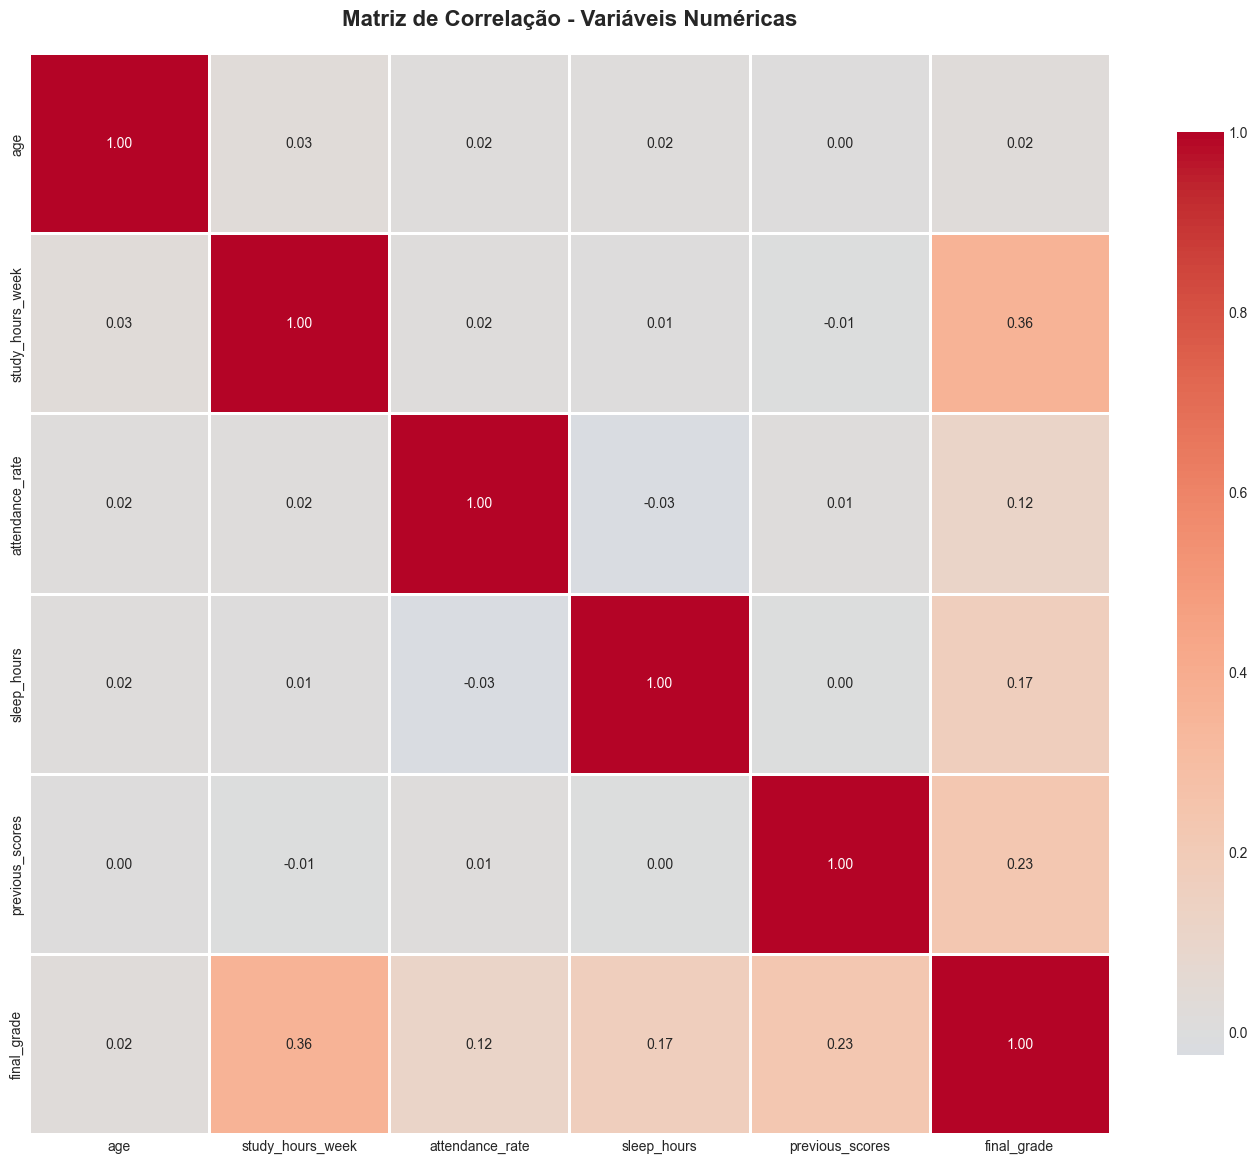

In [35]:
# Matriz de correlação para variáveis numéricas
correlation_matrix = df[numeric_cols].corr()

# Visualizar a matriz de correlação com heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação - Variáveis Numéricas', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


Correlações com a Variável Alvo (final_grade):
study_hours_week    0.362867
previous_scores     0.226769
sleep_hours         0.167616
attendance_rate     0.117923
age                 0.023194
Name: final_grade, dtype: float64


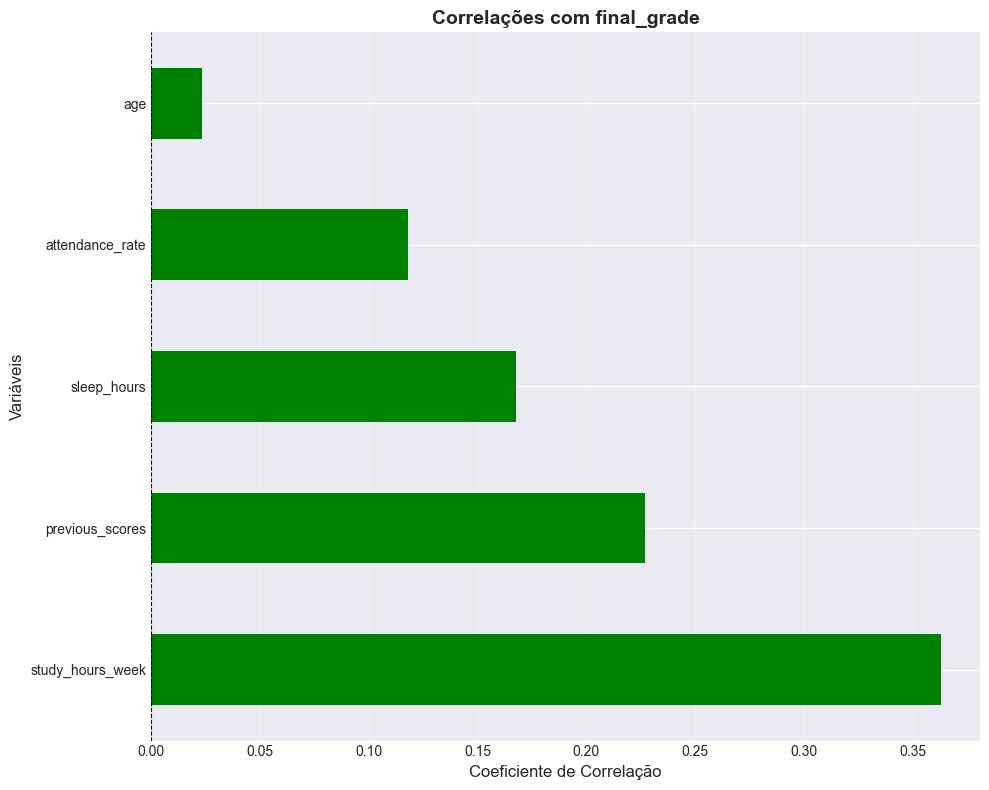

In [36]:
# Identificar correlações mais fortes com a variável alvo
target_variable = 'final_grade'

if target_variable in numeric_cols:
    correlations = correlation_matrix[target_variable].drop(target_variable).sort_values(ascending=False)
    
    print(f"Correlações com a Variável Alvo ({target_variable}):")
    print("="*60)
    print(correlations)
    
    # Visualizar correlações com a variável alvo
    plt.figure(figsize=(10, 8))
    correlations.plot(kind='barh', color=['red' if x < 0 else 'green' for x in correlations.values])
    plt.title(f'Correlações com {target_variable}', fontsize=14, fontweight='bold')
    plt.xlabel('Coeficiente de Correlação', fontsize=12)
    plt.ylabel('Variáveis', fontsize=12)
    plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print(f"A variável alvo '{target_variable}' não foi encontrada nas colunas numéricas.")


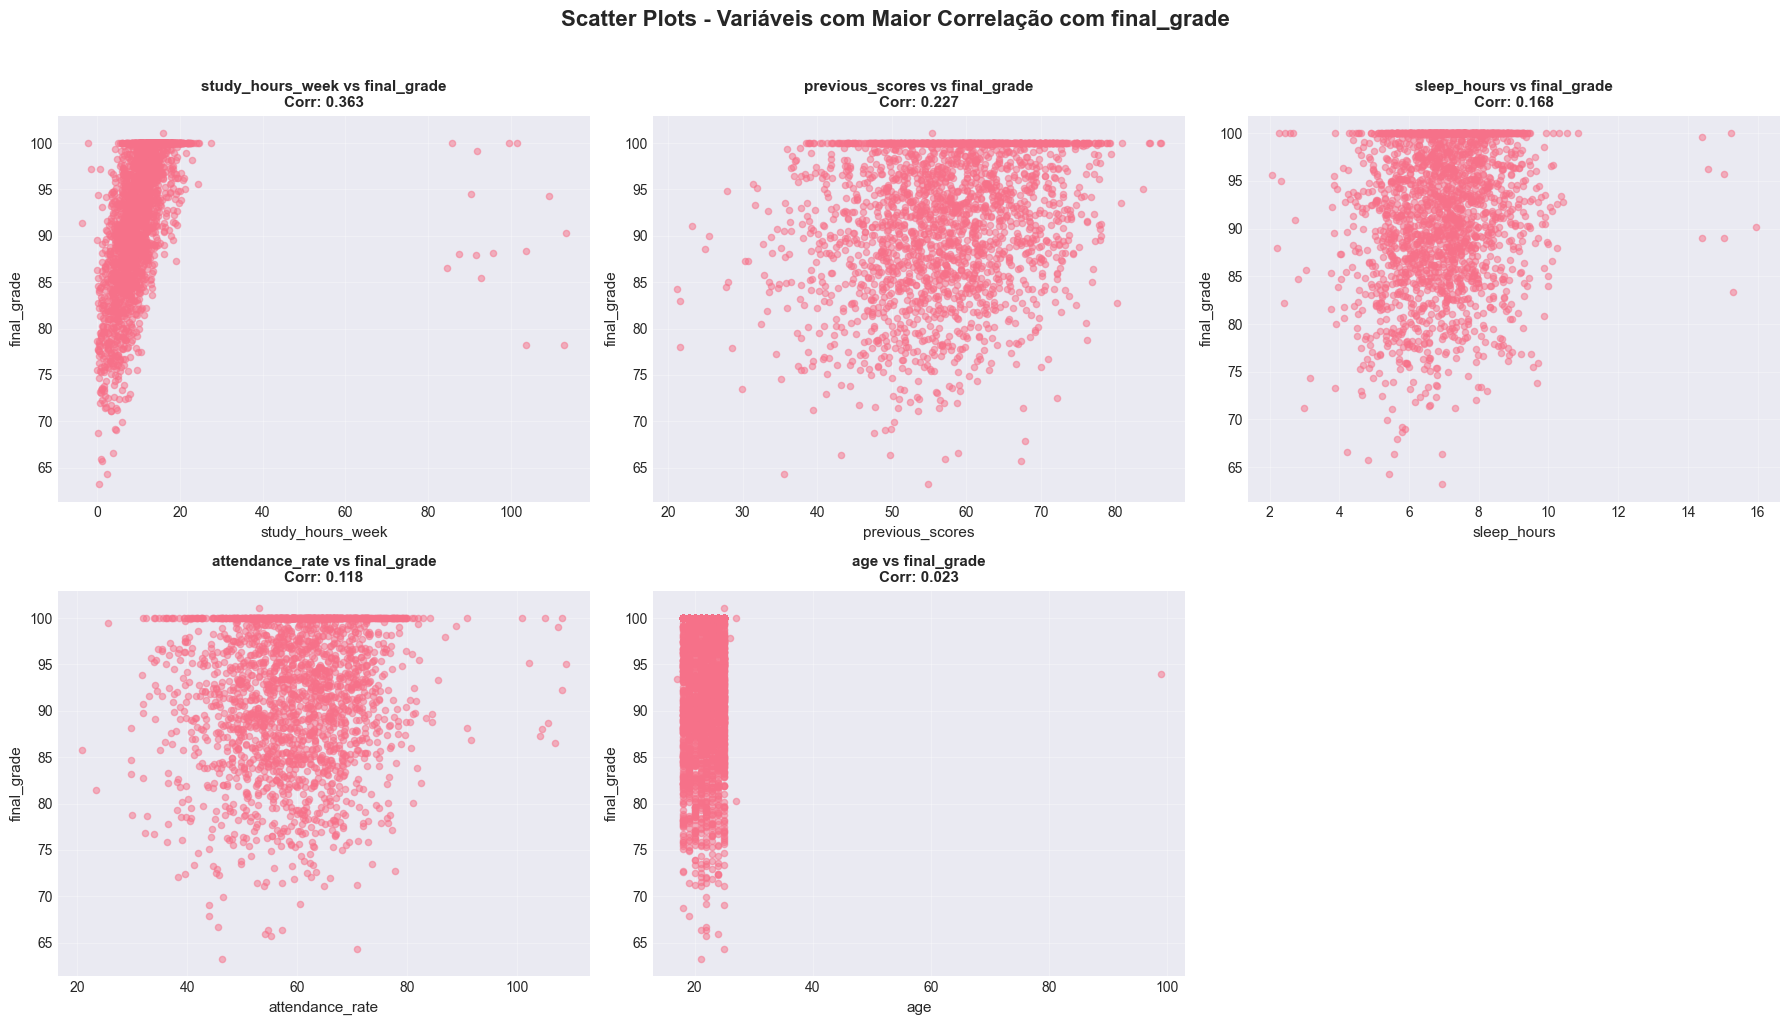

In [37]:
# Scatter plots para variáveis com maior correlação com a variável alvo
target_variable = 'final_grade'

if target_variable in numeric_cols:
    # Pegar as 6 variáveis com maior correlação (absoluta) com a variável alvo
    correlations = correlation_matrix[target_variable].drop(target_variable).abs().sort_values(ascending=False)
    top_correlated = correlations.head(6).index.tolist()
    
    n_cols = 3
    n_rows = (len(top_correlated) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
    axes = axes.flatten() if len(top_correlated) > 1 else [axes]
    
    for idx, col in enumerate(top_correlated):
        if idx < len(axes):
            axes[idx].scatter(df[col], df[target_variable], alpha=0.5, s=20)
            axes[idx].set_xlabel(col, fontsize=11)
            axes[idx].set_ylabel(target_variable, fontsize=11)
            axes[idx].set_title(f'{col} vs {target_variable}\nCorr: {correlation_matrix.loc[col, target_variable]:.3f}', 
                               fontsize=11, fontweight='bold')
            axes[idx].grid(alpha=0.3)
    
    # Ocultar eixos extras se houver
    for idx in range(len(top_correlated), len(axes)):
        axes[idx].set_visible(False)
    
    plt.suptitle(f'Scatter Plots - Variáveis com Maior Correlação com {target_variable}', 
                 fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
else:
    print(f"A variável alvo '{target_variable}' não foi encontrada nas colunas numéricas.")


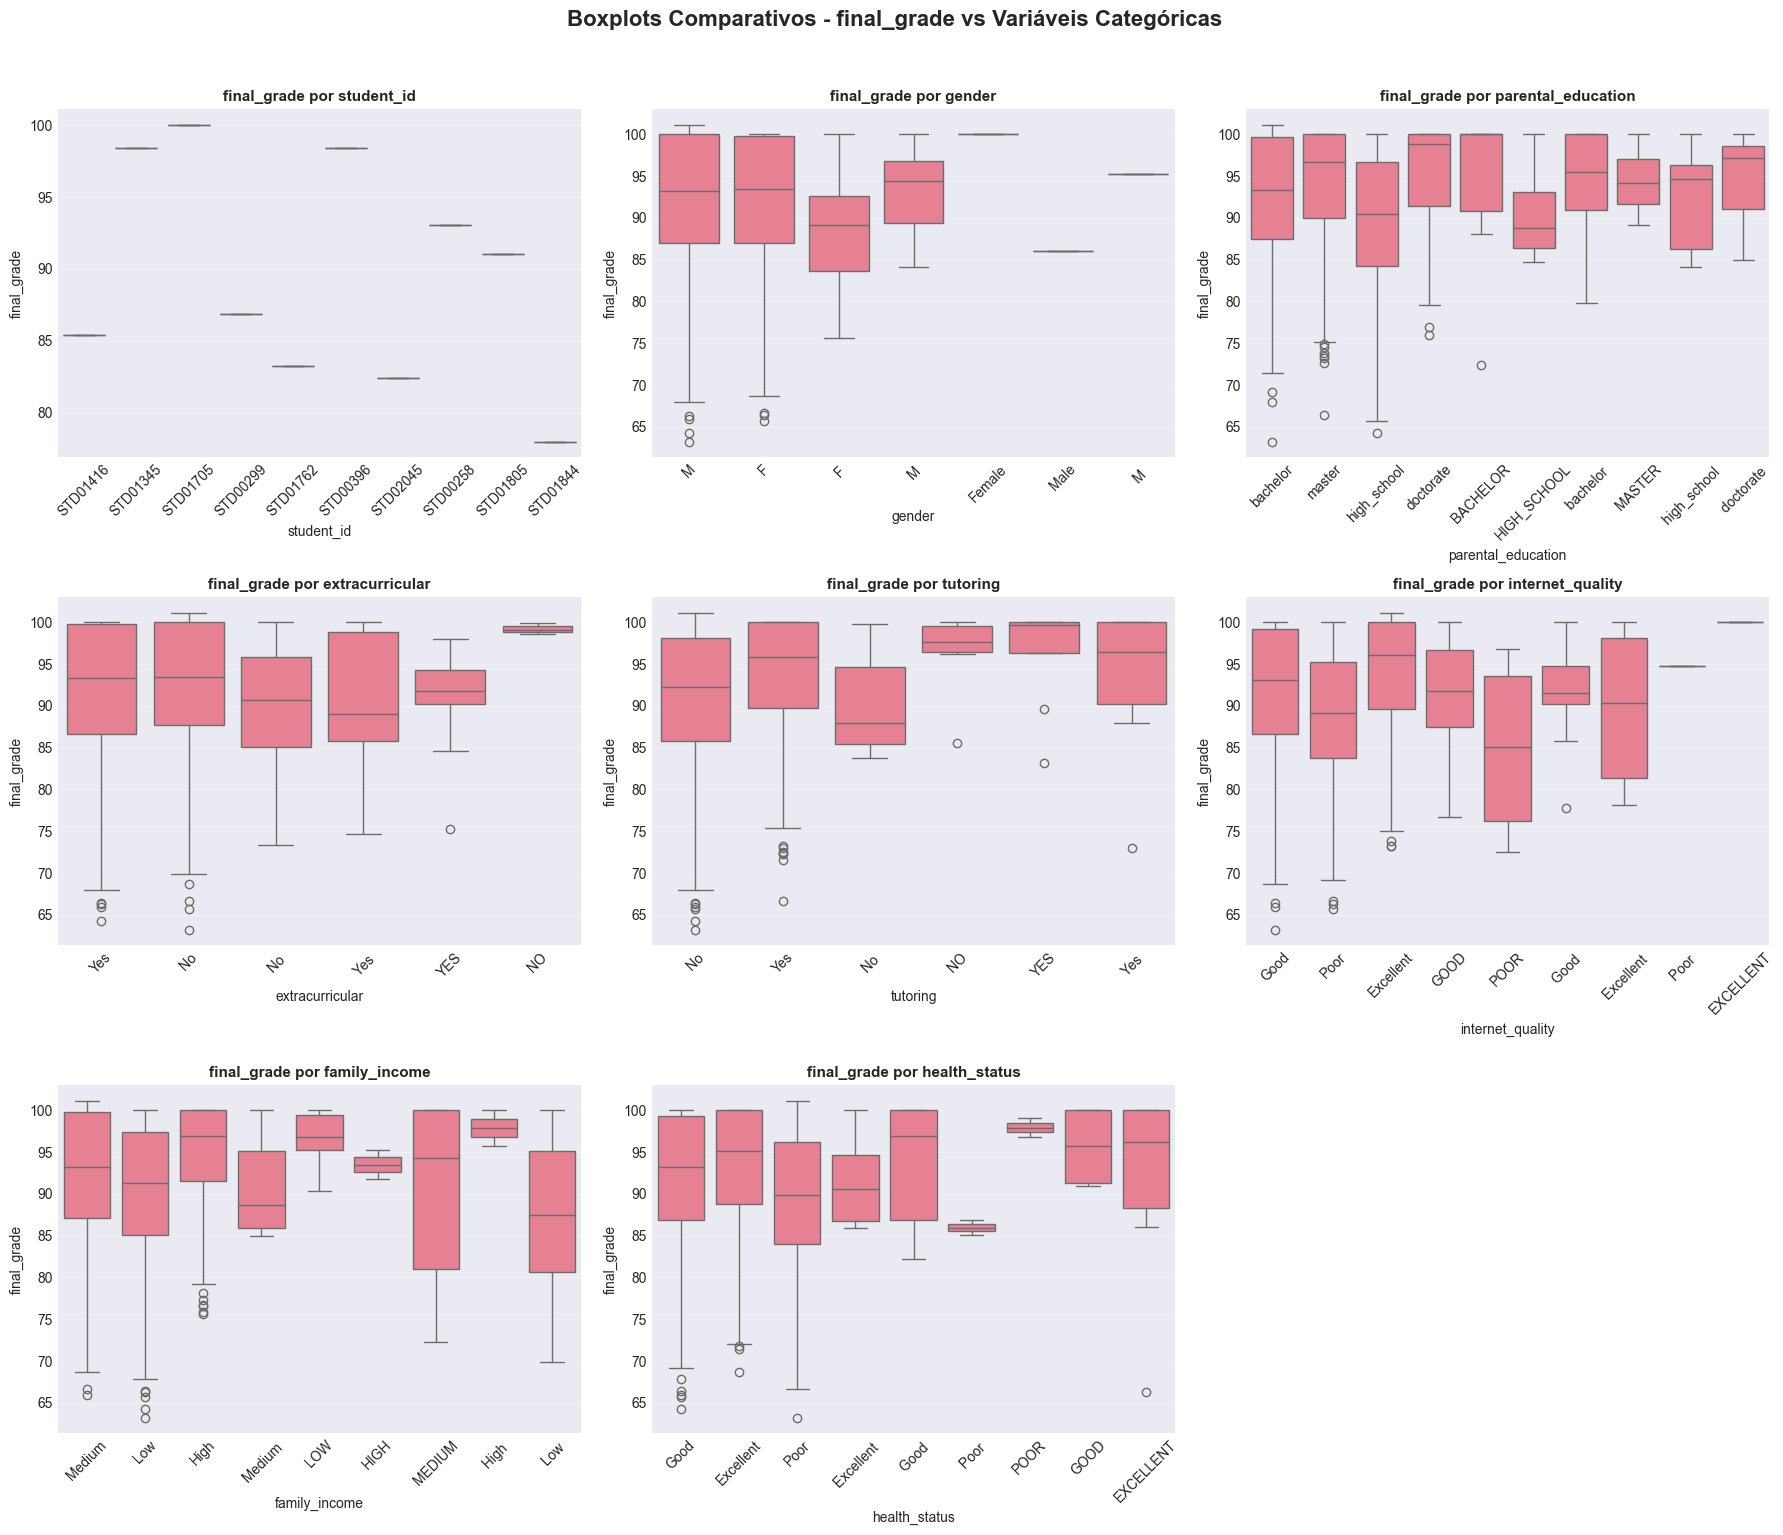

In [38]:
# Boxplots comparativos: variável alvo vs variáveis categóricas
target_variable = 'final_grade'

if target_variable in numeric_cols and len(categorical_cols) > 0:
    n_cols = len(categorical_cols)
    n_rows = (n_cols + 2) // 3
    
    fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5*n_rows))
    axes = axes.flatten() if n_cols > 1 else [axes]
    
    for idx, col in enumerate(categorical_cols):
        if idx < len(axes):
            # Limitar a 10 categorias para melhor visualização
            unique_values = df[col].value_counts().head(10).index.tolist()
            df_filtered = df[df[col].isin(unique_values)]
            
            sns.boxplot(data=df_filtered, x=col, y=target_variable, ax=axes[idx])
            axes[idx].set_title(f'{target_variable} por {col}', fontsize=11, fontweight='bold')
            axes[idx].set_xlabel(col, fontsize=10)
            axes[idx].set_ylabel(target_variable, fontsize=10)
            axes[idx].tick_params(axis='x', rotation=45)
            axes[idx].grid(axis='y', alpha=0.3)
    
    # Ocultar eixos extras se houver
    for idx in range(len(categorical_cols), len(axes)):
        axes[idx].set_visible(False)
    
    plt.suptitle(f'Boxplots Comparativos - {target_variable} vs Variáveis Categóricas', 
                 fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
else:
    if target_variable not in numeric_cols:
        print(f"A variável alvo '{target_variable}' não foi encontrada nas colunas numéricas.")
    if len(categorical_cols) == 0:
        print("Não há variáveis categóricas para comparar.")


### Documentação: Análise Bivariada

**Correlações com a Variável Alvo:**
- Variáveis numéricas com maior correlação positiva: [listar após execução]
- Variáveis numéricas com maior correlação negativa: [listar após execução]

**Relações Interessantes:**
- [Documentar qualquer relação interessante ou inesperada observada nos gráficos]

**Impacto de Variáveis Categóricas:**
- Variável categórica com maior impacto na variável alvo: [identificar após execução]
- Observações: [documentar padrões observados]


## 📊 Resumo das Principais Conclusões

### Principais Descobertas:

1. **Estrutura dos Dados:**
   - [Resumir estrutura encontrada]

2. **Qualidade dos Dados:**
   - [Resumir problemas de qualidade identificados]

3. **Distribuições:**
   - [Resumir características das distribuições]

4. **Relações e Correlações:**
   - [Resumir principais correlações e relações encontradas]

### Próximos Passos:

- [Listar ações recomendadas para as próximas etapas do projeto]
